General steps:
1. Import the data
2. info()
3. Determine input features
4. Determine output features
5. Create an X array of input features
6. Create a Y array of output features
7. Split the data into testing and training 
8. Create the neural network model
9. Metrics - check accuracy, loss, etc.

Ways to tune a network:


1.   Loss
2.   Optimizers
3. Changing the number of neurons / nodes
4. Change the activation function
5. Add a layer



In [ ]:
# import pandas
import pandas as pd

In [ ]:
# load data
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')

In [ ]:
# show info about white - determine which features will be inputs and which will be outputs
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# show first five items in white
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# show last five items in white
white.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [ ]:
# create a binary version of the quality feature
white['winequality'] = [1 if x >= 6 else 0 for x in white['quality']]

<ipython-input-7-7549ad3562f2>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


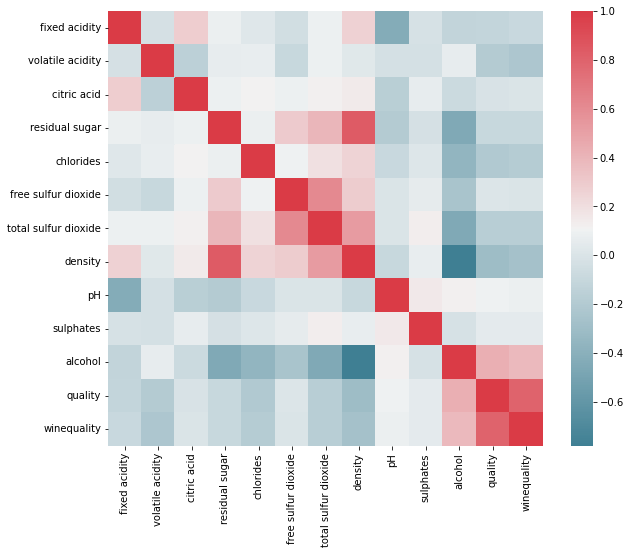

In [ ]:
# check if our features are highly corelated
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
f, ax = plt.subplots(figsize = (10, 8))
corr = white.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap = True), square = True, ax = ax)

In [ ]:
# show the info again
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  winequality           4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [ ]:
# drop the output values from input features, set up Y to use for classification
X = white.drop(['quality', 'winequality', 'density', 'total sulfur dioxide', 'residual sugar'], axis = 1)
Y = white['winequality']

In [ ]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# standardize dataset
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fit = mm.fit(X_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

In [ ]:
# set up the neural network model
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation = 'sigmoid', input_shape = (8,)))
model.add(Dense(8, activation = 'sigmoid'))
model.add(Dense(4, activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# compile the model for the white wine data
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.05)
model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 500, batch_size = 256, verbose = 1, validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/500
16/16 [==============================] - 7s 16ms/step - loss: 0.6458 - accuracy: 0.6598 - val_loss: 0.6204 - val_accuracy: 0.6867
Epoch 2/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.6598 - val_loss: 0.6181 - val_accuracy: 0.6867
Epoch 3/500
16/16 [==============================] - 0s 5ms/step - loss: 0.6152 - accuracy: 0.6598 - val_loss: 0.5582 - val_accuracy: 0.6918
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.5479 - accuracy: 0.7103 - val_loss: 0.5245 - val_accuracy: 0.7357
Epoch 5/500
16/16 [==============================] - 0s 7ms/step - loss: 0.5322 - accuracy: 0.7233 - val_loss: 0.5187 - val_accuracy: 0.7388
Epoch 6/500
16/16 [==============================] - 0s 6ms/step - loss: 0.5266 - accuracy: 0.7284 - val_loss: 0.5370 - val_accuracy: 0.7102
Epoch 7/500
16/16 [==============================] - 0s 5ms/step - loss: 0.5324 - accuracy: 0.7226 - val_loss: 0.5110 - val_accuracy: 0.7531
Epoch 8/500


In [ ]:
# test the model's predictions against our testing data
import numpy as np
Y_pred = np.round(model.predict(X_test))

31/31 [==============================] - 0s 1ms/step


In [ ]:
# show the first 10 predicted values
Y_pred[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# test the model using our testing data
loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Test accuracy: 0.785
Train accuracy: 0.798


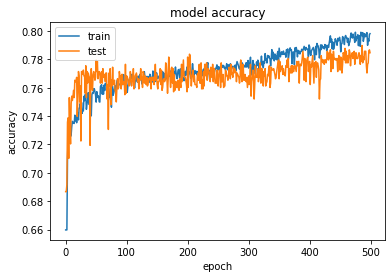

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
# start working with the red wine data
red.info()
red.head()
red.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
# modify the red data as needed, create redX and redY
red['winequality'] = [1 if x >= 6 else 0 for x in red['quality']]
redX = red.drop(['quality', 'winequality'], axis = 1)
redY = red['winequality']

In [ ]:
# split the red data for testing and training
from sklearn.model_selection import train_test_split
redX_train, redX_test, redY_train, redY_test = train_test_split(redX, redY, test_size = 0.2)

In [ ]:
# standardize the red data
mm = MinMaxScaler()
fit = mm.fit(redX_train)
redX_train = fit.transform(redX_train)
redX_test = fit.transform(redX_test)

In [ ]:
# set up the neural network model for the red data
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, activation = 'relu', input_shape = (11,)))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(1, activation = 'tanh'))

In [ ]:
## compile the model for the red wine data
import keras
import tensorflow as tf
opt = tf.keras.optimizers.experimental.AdamW(learning_rate = 0.01)
#opt = keras.optimizers.Adam()
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
history = model.fit(redX_train, redY_train, epochs = 20, batch_size = 8, verbose = 1)

# test the model using our testing data
loss, acc = model.evaluate(redX_test, redY_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

# test the model using our training data
loss, acc = model.evaluate(redX_train, redY_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/20
160/160 [==============================] - 2s 6ms/step - loss: 0.7668 - accuracy: 0.5950
Epoch 2/20
160/160 [==============================] - 1s 6ms/step - loss: 0.5591 - accuracy: 0.7091
Epoch 3/20
160/160 [==============================] - 1s 4ms/step - loss: 0.5402 - accuracy: 0.7373
Epoch 4/20
160/160 [==============================] - 1s 4ms/step - loss: 0.5382 - accuracy: 0.7373
Epoch 5/20
160/160 [==============================] - 1s 4ms/step - loss: 0.5266 - accuracy: 0.7506
Epoch 6/20
160/160 [==============================] - 1s 4ms/step - loss: 0.5399 - accuracy: 0.7287
Epoch 7/20
160/160 [==============================] - 1s 4ms/step - loss: 0.5233 - accuracy: 0.7435
Epoch 8/20
160/160 [==============================] - 1s 4ms/step - loss: 0.5196 - accuracy: 0.7475
Epoch 9/20
160/160 [==============================] - 1s 4ms/step - loss: 0.5335 - accuracy: 0.7435
Epoch 10/20
160/160 [==============================] - 1s 4ms/step - loss: 0.5274 - accuracy: 0.7498

My notes:


*   Adam seems to be the best optimizer, no matter which activation function or loss is being used
*   More epochs do not always improve the results
*   I have a hard time getting the model above 80% accuracy, no matter which combination of optimizer/activation function/number of layers I use
*   Manually specifying the learning rate can have a huge impact
*   Best results: 0.766 test, 0.773 train



In [ ]:
# test the red wine model's predictions against our testing data
import numpy as np
redY_pred = np.round(model.predict(redX_test))
redY_pred[0:10]

10/10 [==============================] - 0s 3ms/step


array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
# for regression model instead of classification
# load data
import pandas as pd
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')

In [ ]:
X = white.drop(['quality'], axis = 1)
Y = white['quality']

In [ ]:
# split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
# standardize dataset
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
fit = mm.fit(X_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

In [ ]:
# set up the neural network regression model
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (11,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [ ]:
# compile regression model for the white wine data
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.005)
model.compile(loss = 'mae', optimizer = opt, metrics = ['mae'])
history = model.fit(X_train, Y_train, epochs = 500, batch_size = 1024, verbose = 1, validation_data=(X_test, Y_test))

loss, acc = model.evaluate(X_test, Y_test, verbose = 0)
print('Test accuracy: %.3f' %acc)

loss, acc = model.evaluate(X_train, Y_train, verbose = 0)
print('Train accuracy: %.3f' %acc)

Epoch 1/500
4/4 [==============================] - 2s 78ms/step - loss: 4.7482 - mae: 4.7482 - val_loss: 0.9396 - val_mae: 0.9396
Epoch 2/500
4/4 [==============================] - 0s 17ms/step - loss: 2.1012 - mae: 2.1012 - val_loss: 0.9063 - val_mae: 0.9063
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 1.5475 - mae: 1.5475 - val_loss: 1.4280 - val_mae: 1.4280
Epoch 4/500
4/4 [==============================] - 0s 14ms/step - loss: 1.1081 - mae: 1.1081 - val_loss: 1.4792 - val_mae: 1.4792
Epoch 5/500
4/4 [==============================] - 0s 13ms/step - loss: 1.0428 - mae: 1.0428 - val_loss: 1.0535 - val_mae: 1.0535
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 1.0389 - mae: 1.0389 - val_loss: 0.7591 - val_mae: 0.7591
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 0.8605 - mae: 0.8605 - val_loss: 0.8085 - val_mae: 0.8085
Epoch 8/500
4/4 [==============================] - 0s 12ms/step - loss: 0.7836 - mae: 0.78

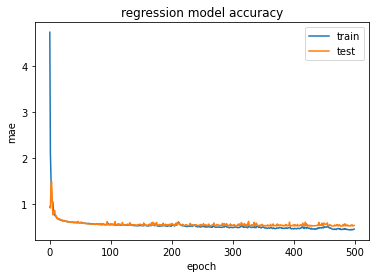

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('regression model accuracy')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()